# Data Info.

The data set contains 3 clases of 50 instances each
Each class refers to a type of **Iris Plant** 
One class is **linearly separable** from the other two;
the **latter are NOT Linearly seperable** from each other.

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the Data
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# deleting a column

df = df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# To display stats of the data

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# To display number of samples in each class

df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
# Preprocessing the data
# checking for null values

df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis


<Axes: >

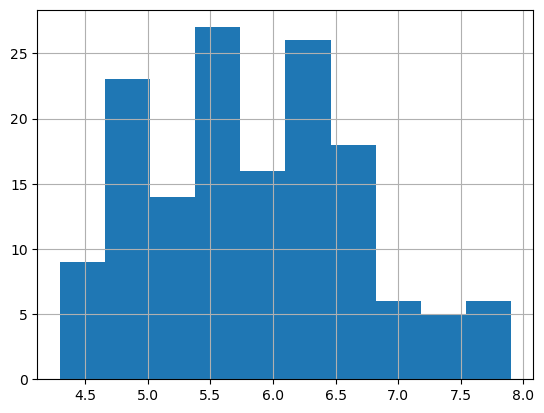

In [10]:
# histogram

df['SepalLengthCm'].hist()

<Axes: >

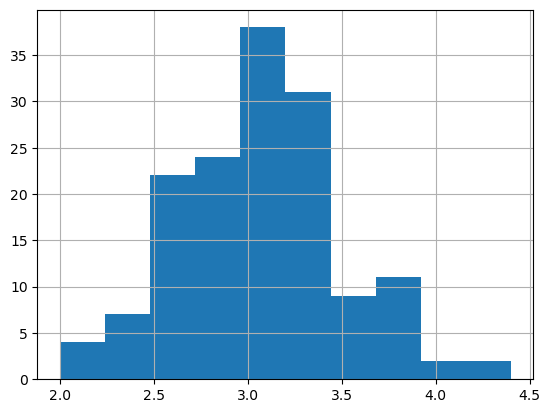

In [11]:
df['SepalWidthCm'].hist()

<Axes: >

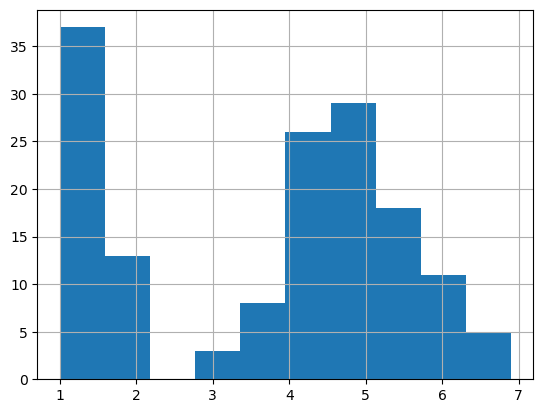

In [12]:
df['PetalLengthCm'].hist()

<Axes: >

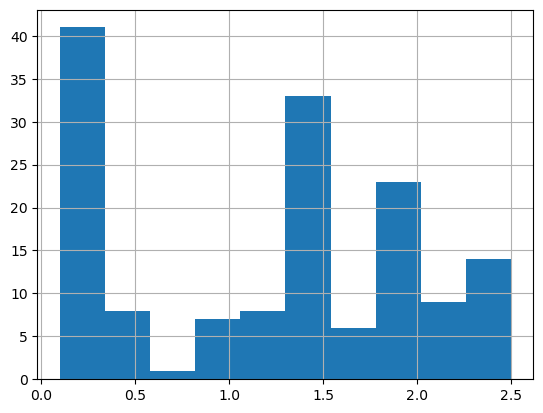

In [14]:
df['PetalWidthCm'].hist()

In [18]:
# ScatterPlot

color = ['red', 'orange', 'blue']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

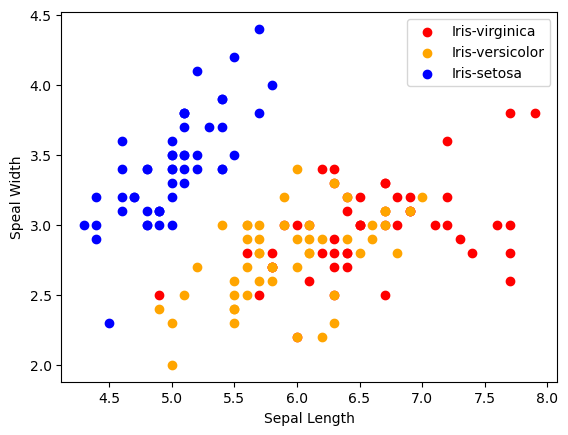

In [19]:
for i in range(3):
    x = df[df['Species']== species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c= color[i], label = species[i])

plt.xlabel("Sepal Length")
plt.ylabel("Speal Width")
plt.legend()

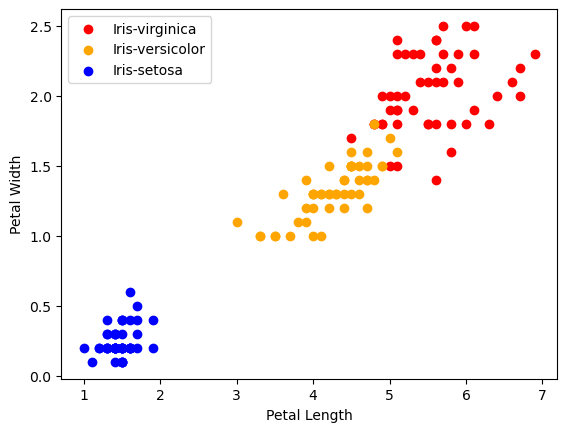

In [21]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = color[i], label= species[i] )

plt.xlabel('Petal Length')
plt.ylabel("Petal Width")
plt.legend()
            
                  

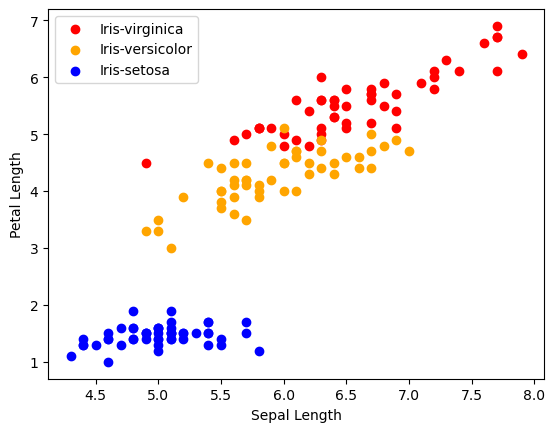

In [24]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = color[i], label = species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

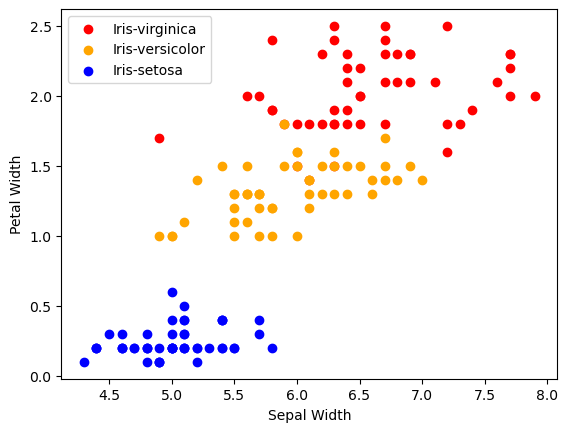

In [25]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalWidthCm'], c = color[i], label = species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

In [26]:
# correlation Matrix
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

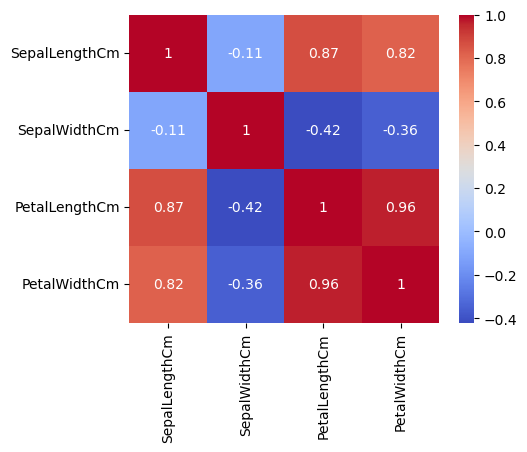

In [28]:
corr = df.corr()
fig, ax = plt.subplots(figsize =(5,4))
sns.heatmap(corr, annot = True, ax =ax, cmap ='coolwarm')

# Label encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training 

In [32]:
from sklearn.model_selection import train_test_split

X= df.iloc[:,:-1]
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)


## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [35]:
# training model

model.fit(X_train, y_train)

LogisticRegression()

In [36]:
print("Accuracy Score" , model.score(X_test, y_test)*100)

Accuracy Score 95.55555555555556


## k-nearest neighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [38]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
print("Accuracy Score : ", model.score(X_test, y_test)*100)

Accuracy Score :  95.55555555555556


## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [42]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
print("Accuracy Score : ", model.score(X_test, y_test)*100)

Accuracy Score :  93.33333333333333
